import libraries

In [1]:
from dtocs import *
from helper import *
from maps import *
import numpy as np
import matplotlib.pyplot as plt
from gdal_interfaces import GDALTileInterface, GDALInterface


# Setup Data folder and GDAL Interface parameter with tiling)
- dirpath: path to the directory where datasets subfolder is stored
- elevation_path: path to folder containing elevation tiles
- landcover_path: path to folder containing landcover tiles

In [2]:
dirpath = "C:/Users/SAMARTH/Desktop/MTP/mtp/"

elevation_path = dirpath + "elevation"
landcover_path = dirpath + "landcover"
elevation_summary_path = elevation_path + "/elevation_summary.json"
landcover_summary_path = landcover_path + "/landcover_summary.json"

ALWAYS_REBUILD_SUMMARY = True
OPEN_INTERFACES_SIZE = 8

In [3]:
elevation_data_interface = GDALTileInterface(elevation_path, elevation_summary_path, OPEN_INTERFACES_SIZE)
landcover_data_interface = GDALTileInterface(landcover_path, landcover_summary_path, OPEN_INTERFACES_SIZE)

if elevation_data_interface.has_summary_json() and not ALWAYS_REBUILD_SUMMARY:
    print('Re-using existing summary JSON')
    elevation_data_interface.read_summary_json()
else:
    print('Creating summary JSON ...')
    elevation_data_interface.create_summary_json()
    
if landcover_data_interface.has_summary_json() and not ALWAYS_REBUILD_SUMMARY:
    print('Re-using existing summary JSON')
    landcover_data_interface.read_summary_json()
else:
    print('Creating summary JSON ...')
    landcover_data_interface.create_summary_json()

Creating summary JSON ...
Processing C:/Users/SAMARTH/Desktop/MTP/mtp/elevation\iit_mandi1.tif ... (0.06269168853759766 MB)
	Done! LAT (31.759662413134603,31.806823965550876) | LNG (76.9625480332187,77.05417619219888)
Processing C:/Users/SAMARTH/Desktop/MTP/mtp/elevation\india-0000000000-0000000000.tif ... (1998.9265146255493 MB)
	Done! LAT (24.40879750054504,36.965089215854064) | LNG (69.3365208659107,81.89281258121972)
Processing C:/Users/SAMARTH/Desktop/MTP/mtp/elevation\india-0000000000-0000046592.tif ... (517.5756731033325 MB)
	Done! LAT (24.40879750054504,36.965089215854064) | LNG (81.89281258121972,85.06907576280952)
Processing C:/Users/SAMARTH/Desktop/MTP/mtp/elevation\india-0000046592-0000000000.tif ... (1010.6179504394531 MB)
	Done! LAT (11.85250578523602,24.40879750054504) | LNG (69.3365208659107,81.89281258121972)
Processing C:/Users/SAMARTH/Desktop/MTP/mtp/elevation\india-0000046592-0000046592.tif ... (238.30295276641846 MB)
	Done! LAT (11.85250578523602,24.40879750054504)

# Bounding box and path dataset filepath
- Add lat1,lon1 and lat2,lon2
- Change resolution
- Add dataset(.tif files) filepath (for GDAL interface (without tiling))

In [4]:
# USA random mountain
# lon1, lat1 = -109.83007049344715, 44.36470033197011
# lon2, lat2 = -109.7513685303535, 44.29673563882564

# India
# lon1, lat1 = 77.28112208857522,32.135432817449384
# lon2, lat2 = 77.62169826045022,31.94918029751246

# Colorado [Whole region]
# lon1, lat1 = -106.72643114729188,38.84785651131714
# lon2, lat2 = -105.95392348402243,39.458493653253676

# Colorado (peak to peak example)
# lat1, lon1 = 38.94374018363843, -106.5759101561709
# lat2, lon2 = 39.04527792014898, -106.38578062842298

# manali (hanuman tibba - manali)
# lat1, lon1 = 32.372571, 76.983637
# lat2, lon2 = 32.189737, 77.315875

# Sissu Batal  [shape:  623 1986]
# lat1, lon1 = 32.474, 77.110
# lat2, lon2 = 32.306, 77.745

# Khanahr peak (small area testing)
# lat1, lon1 = 31.801535462745512, 76.97623916145938
# lat2, lon2 = 31.784061604490404, 77.01031292952429

# Griffon peak (small area testing)
lat1, lon1 = 31.800723508286747, 76.94858578581308
lat2, lon2 = 31.76176517190518, 76.99510825525397

# palan - sosan  [shape:  2272 3069]
# lat1, lon1 = 32.537047, 76.554121
# lat2, lon2 = 31.924304, 77.535921

# arnehar - mandi  [shape:  65 108]
# lat1, lon1 = 31.778518, 77.013229
# lat2, lon2 = 31.764576, 77.042884

# keylong - tosh
# lat1, lon1 = 32.553983959102354, 76.9572465564983
# lat2, lon2 = 32.02887381373745, 77.50664575756166

# menthosa - sosan
# lat1, lon1 = 32.90954351269039, 76.68373432249861
# lat2, lon2 = 31.863216801377973, 77.67972370282335

resolution = 30

# Generate Matrix
- Using GDAL tile interface

In [5]:
elevation_map, landcover_map = getGrayLevelMatrixFromDataSet(lon1, lat1, lon2, lat2, elevation_data_interface, landcover_data_interface, resolution)

start:  31.800723508286747 76.94858578581308
end:  31.76176517190518 76.99510825525397
shape:  145 147


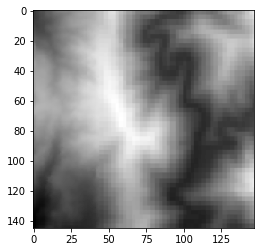

In [6]:
plt.imshow(elevation_map,cmap='gray')
plt.show()

- Using multithreading

In [13]:
elevation_map_multithread, landcover_map_multithread = getGreyLevelMultiThread(lon1, lat1, lon2, lat2, elevation_data_interface, landcover_data_interface, resolution)

start:  32.474 77.11
end:  32.306 77.745
shape:  623 1986
start points:  [0, 156, 312, 468]


: 

: 

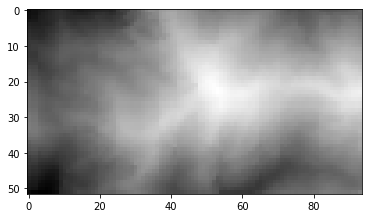

In [9]:
plt.imshow(elevation_map_multithread,cmap='gray')
plt.show()

In [9]:
print(elevation_map_multithread)
print(elevation_map)

[[1171 1175 1166 ... 1347 1325 1318]
 [1165 1159 1155 ... 1359 1341 1336]
 [1142 1136 1132 ... 1373 1356 1343]
 ...
 [1257 1246 1218 ... 1118 1122 1132]
 [1257 1240 1223 ... 1122 1118 1121]
 [1247 1240 1227 ... 1130 1121 1122]]
[[1171 1175 1166 ... 1347 1325 1318]
 [1165 1159 1155 ... 1359 1341 1336]
 [1142 1136 1132 ... 1373 1356 1343]
 ...
 [1257 1246 1218 ... 1118 1122 1132]
 [1257 1240 1223 ... 1122 1118 1121]
 [1247 1240 1227 ... 1130 1121 1122]]


In [10]:
print("Elevation Map Info")
print(f"Gray Map Shape: {elevation_map.shape}")
print(f"Min: {elevation_map.min()}")
print(f"Max: {elevation_map.max()}")


print("Elevation MultiThread Map Info")
print(f"Gray Map Shape: {elevation_map_multithread.shape}")
print(f"Min: {elevation_map_multithread.min()}")
print(f"Max: {elevation_map_multithread.max()}")

Elevation Map Info
Gray Map Shape: (65, 108)
Min: 978
Max: 1680
Elevation MultiThread Map Info
Gray Map Shape: (65, 108)
Min: 978
Max: 1680


c:\Users\SAMARTH\AppData\Local\Programs\Python\Python38\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<AxesSubplot:>

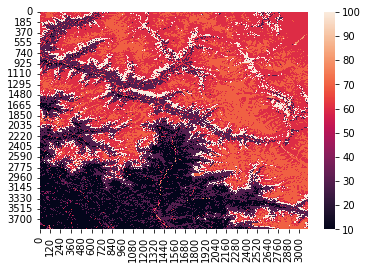

In [8]:
import seaborn as sns
sns.heatmap(landcover_map)

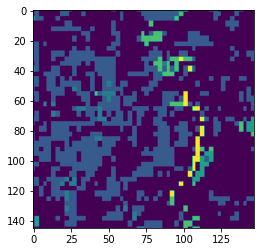

In [7]:
plt.imshow(landcover_map)
plt.show()

Source and Destination

In [8]:
n,m = elevation_map.shape

# USA random
# src_lon,src_lat = -109.81884898177093,44.32480359458633
# des_lon,des_lat = -109.77537406272984,44.30294042398075

# src_lat, src_lon = 38.98065379328955, -106.528761396495
# des_lat, des_lon = 39.02089538747208, -106.42163602957328

# src_lat, src_lon = 32.243724, 77.204016
# src_lat, src_lon = 32.350336, 77.129226

# hanuman tibba
# src_lat, src_lon = 32.216951, 77.231191
# des_lat, des_lon = 32.341876, 77.040854

# src_lat, src_lon = 31.775167, 77.017773
# des_lat, des_lon = 31.772527, 77.029848

# Griffon peak from kamand bridge
src_lat, src_lon = 31.78026039724837, 76.98353775191406
des_lat, des_lon = 31.77730386806442, 76.96974603761053

# palan
# src_lat, src_lon = 32.369789, 76.766289
# des_lat, des_lon = 32.076790, 77.312516

# menthosa - sosan
# src_lat, src_lon = 32.80644936709285, 76.82298402202355
# des_lat, des_lon = 32.29517226314917, 77.4885503853536

src_latIdx,src_lonIdx = findIndex(src_lat,src_lon, lat1,lon1, lat2,lon2, resolution)
des_latIdx,des_lonIdx = findIndex(des_lat,des_lon, lat1,lon1, lat2,lon2, resolution)

Dijkstra

In [9]:
# from dijkstra import dijkstraFromSrc, dijkstraFromSrcWithLC, showPathDijkstra
from dijkstra import dijkstraFromSrc, showPathDijkstra

In [21]:
alpha = 0
h_weight = 0.1
slope = 30
# distFromSrc, parentMat  = dijkstraFromSrc(elevation_map, src_latIdx, src_lonIdx, resolution)
distFromSrc, parentMat  = dijkstraFromSrc(elevation_map, landcover_map, src_latIdx, src_lonIdx, alpha, h_weight, resolution, slope)

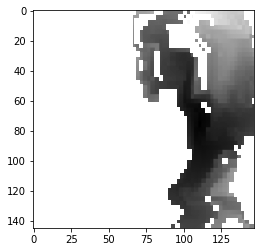

In [22]:
plt.imshow(distFromSrc,cmap='gray')
plt.show()

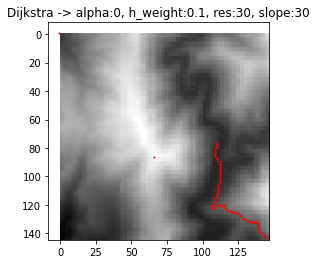

In [23]:
showPathDijkstra(elevation_map, parentMat, src_latIdx, src_lonIdx, des_latIdx, des_lonIdx, alpha, h_weight, resolution, slope)